## 梯度下降法求 A$\cdot$x=b

In [42]:
import numpy as np
from numpy import linalg as LA

def is_pos_def(x):
    """check if a matrix is symmetric positive definite"""
    return np.all(np.linalg.eigvals(x) > 0)

def steepest_descent(A, b, x):
    """
    Solve Ax = b
    Parameter x: initial values
    """
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b - A @ x   # @ 為矩陣乘法
    k = 0
    while LA.norm(r) > 1e-10 :
        p = r
        q = A @ p
        alpha = (p @ r) / (p @ q)
        x = x + alpha * p
        r = r - alpha * q
        k =+ 1

    return x

In [47]:
steepest_descent(np.array([[3,2],[2,3]]),np.array([-2,7]),np.array([0,0]))

array([-4.,  5.])

### 梯度下降法視覺化

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

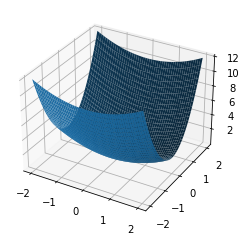

In [26]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]   # 創造背景
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

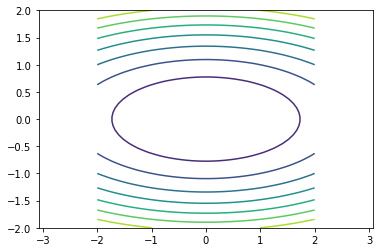

In [31]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)

In [4]:
guesses = [np.array([2, 2./5])]

In [24]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[0.00060146 0.00012029]


In [40]:
guesses

[array([2. , 0.4]),
 array([ 1.33333333, -0.26666667]),
 array([0.88888889, 0.17777778]),
 array([ 0.59259259, -0.11851852]),
 array([0.39506173, 0.07901234]),
 array([ 0.26337448, -0.0526749 ]),
 array([0.17558299, 0.0351166 ]),
 array([ 0.11705533, -0.02341107]),
 array([0.07803688, 0.01560738]),
 array([ 0.05202459, -0.01040492]),
 array([0.03468306, 0.00693661]),
 array([ 0.02312204, -0.00462441]),
 array([0.01541469, 0.00308294]),
 array([ 0.01027646, -0.00205529]),
 array([0.00685097, 0.00137019]),
 array([ 0.00456732, -0.00091346]),
 array([0.00304488, 0.00060898]),
 array([ 0.00202992, -0.00040598]),
 array([0.00135328, 0.00027066]),
 array([ 0.00090219, -0.00018044]),
 array([0.00060146, 0.00012029])]

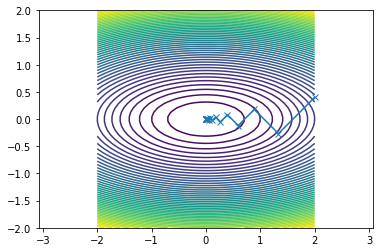

In [54]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")